In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.decomposition import PCA

In [5]:
data = pd.read_csv('CC_GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(2)

,Total,Percent
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173


In [10]:
### Exporting pandas profiling output to html file

output = pandas_profiling.ProfileReport(data)

output.to_file(output_file='pandas_profiling.html')

In [11]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
['CUST_ID']


In [14]:
data_num=data[numeric_var_names]
data_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
data_cat = data[cat_var_names]
data_cat.head(5)

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


In [16]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(lambda x: var_summary(x)).T

In [18]:
num_summary.round()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,14002050.0,1564.0,873.0,2082.0,4332775.0,0.0,0.0,9.0,24.0,128.0,873.0,2054.0,4339.0,5909.0,9339.0,19043.0
BALANCE_FREQUENCY,8950.0,0.0,7852.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PURCHASES,8950.0,0.0,8978683.0,1003.0,361.0,2137.0,4565208.0,0.0,0.0,0.0,0.0,40.0,361.0,1110.0,2543.0,3999.0,8977.0,49040.0
ONEOFF_PURCHASES,8950.0,0.0,5302314.0,592.0,38.0,1660.0,2755228.0,0.0,0.0,0.0,0.0,0.0,38.0,577.0,1600.0,2671.0,6690.0,40761.0
INSTALLMENTS_PURCHASES,8950.0,0.0,3679055.0,411.0,89.0,904.0,817827.0,0.0,0.0,0.0,0.0,0.0,89.0,469.0,1140.0,1750.0,3886.0,22500.0
CASH_ADVANCE,8950.0,0.0,8760896.0,979.0,0.0,2097.0,4398096.0,0.0,0.0,0.0,0.0,0.0,0.0,1114.0,3066.0,4647.0,9588.0,47137.0
PURCHASES_FREQUENCY,8950.0,0.0,4389.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0


In [19]:
#Handling Outliers -
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [25]:
num_summary2=data_num.apply(lambda x: var_summary(x)).T
num_summary2.round()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,13792368.0,1541.0,873.0,1967.0,3867506.0,0.0,0.0,9.0,24.0,128.0,873.0,2054.0,4339.0,5909.0,9337.0,9339.0
BALANCE_FREQUENCY,8950.0,0.0,7859.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PURCHASES,8950.0,0.0,8379252.0,936.0,361.0,1525.0,2326190.0,0.0,0.0,0.0,0.0,40.0,361.0,1110.0,2543.0,3999.0,8962.0,8977.0
ONEOFF_PURCHASES,8950.0,0.0,4801619.0,536.0,38.0,1097.0,1203219.0,0.0,0.0,0.0,0.0,0.0,38.0,577.0,1600.0,2671.0,6684.0,6690.0
INSTALLMENTS_PURCHASES,8950.0,0.0,3441260.0,384.0,89.0,676.0,457343.0,0.0,0.0,0.0,0.0,0.0,89.0,469.0,1140.0,1750.0,3886.0,3886.0
CASH_ADVANCE,8950.0,0.0,8376493.0,936.0,0.0,1776.0,3153374.0,0.0,0.0,0.0,0.0,0.0,0.0,1114.0,3066.0,4647.0,9584.0,9588.0
PURCHASES_FREQUENCY,8950.0,0.0,4389.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3262.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1199.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [21]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [23]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT         

In [26]:
data_num.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,0.445766,0.133319,0.528972,0.344744,0.587668,-0.331618,0.074122
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098461,0.092491,0.208279,-0.098040,0.121525
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.367477,0.536270,0.131455,0.202887,0.107263
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,-0.067593,0.630735,0.342667,0.482418,0.064248,0.145981,0.080378
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,-0.111387,0.687538,0.239973,0.369886,0.148561,0.215048,0.103310
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,0.314398,0.425517,0.257143,-0.179068,-0.083485
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119658,0.120897,0.001043,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296128,0.278313,-0.016426,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060279,0.097830,0.032330,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134731,0.215544,0.203585,-0.253292,-0.129136


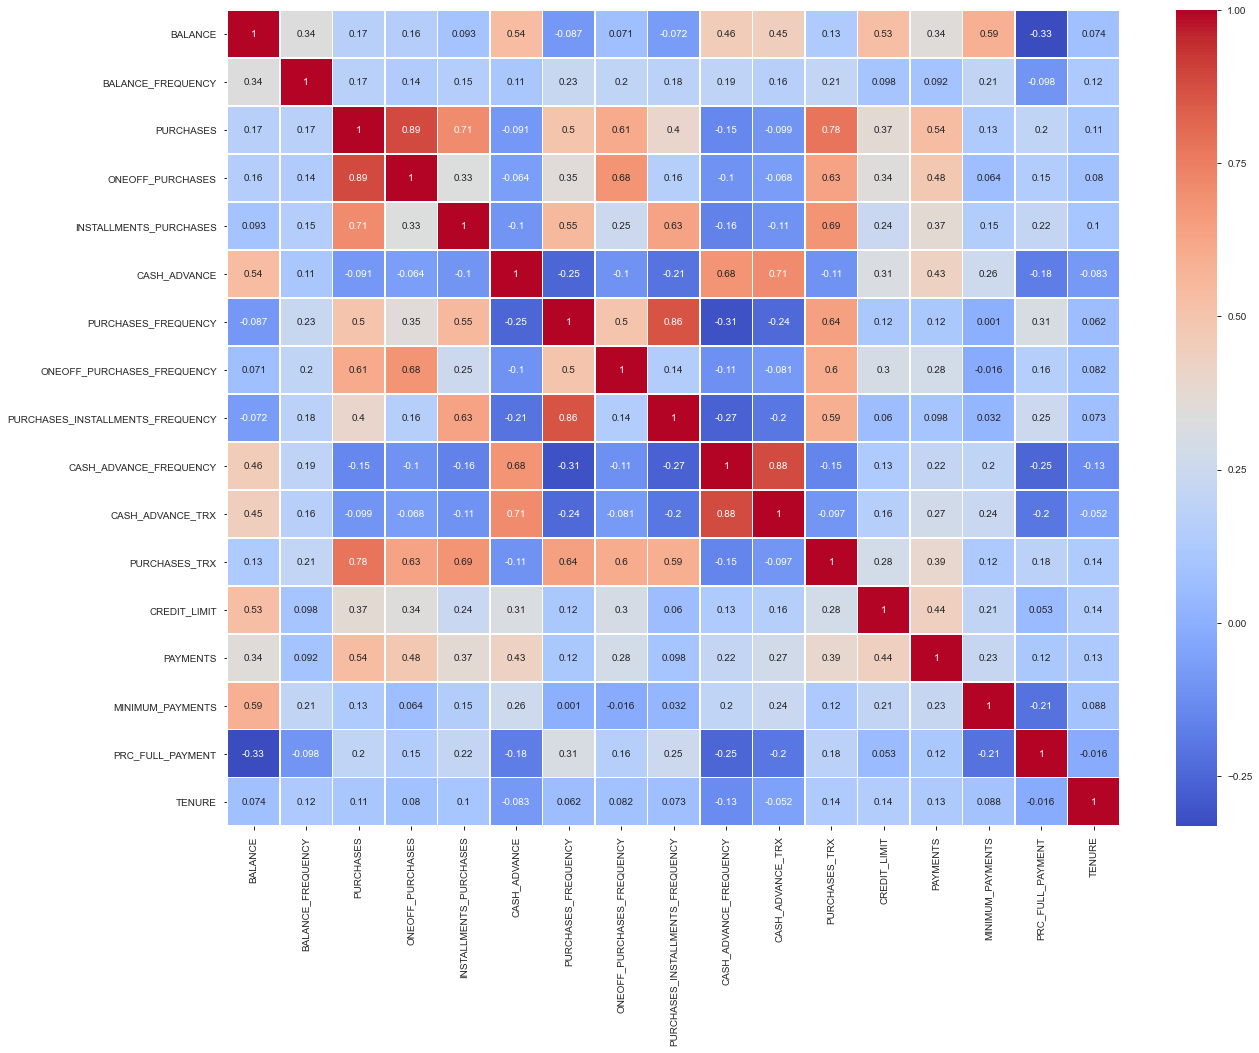

In [28]:
import seaborn as sns
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(20,15))
sns.heatmap(data_num.corr(),annot=True,cmap='coolwarm',linewidths=0.5)

#### KPIs


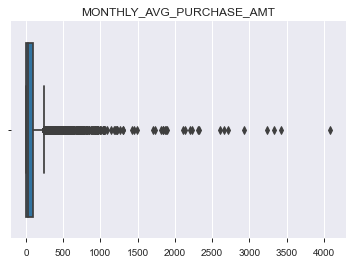

In [107]:
plt.title("MONTHLY_AVG_PURCHASE_AMT")
sns.boxplot(data['PURCHASES']/data['TENURE'])

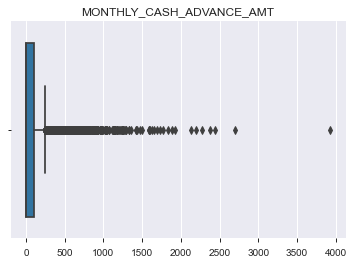

In [108]:
plt.title("MONTHLY_CASH_ADVANCE_AMT")
sns.boxplot(data['CASH_ADVANCE']/data['TENURE'])

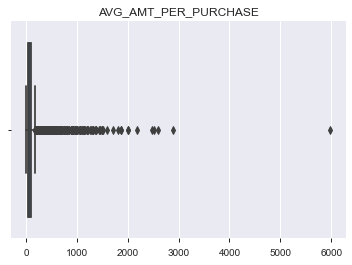

In [109]:
plt.title("AVG_AMT_PER_PURCHASE")
sns.boxplot(data['PURCHASES']/data['PURCHASES_TRX'])

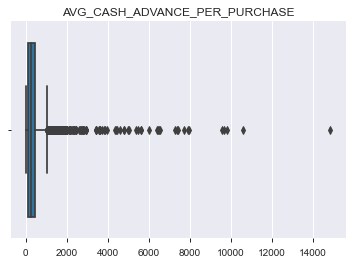

In [110]:
plt.title("AVG_CASH_ADVANCE_PER_PURCHASE")
sns.boxplot(data['CASH_ADVANCE']/data['CASH_ADVANCE_TRX'])

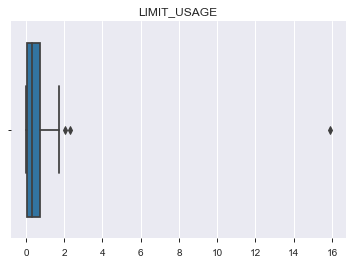

In [111]:
plt.title("LIMIT_USAGE")
sns.boxplot(data['BALANCE']/data['CREDIT_LIMIT'])

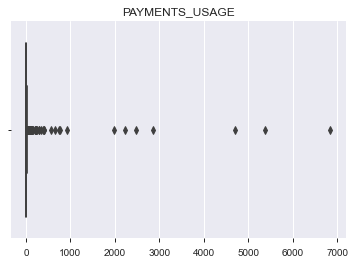

In [112]:
plt.title("PAYMENTS_USAGE")
sns.boxplot(data['PAYMENTS']/data['MINIMUM_PAYMENTS'])

### Standardrizing data
To put data on the same scale

In [29]:
data_num.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [30]:
sc=StandardScaler()


data_scaled=sc.fit_transform(data_num)

In [31]:
pd.DataFrame(data_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.762856,-0.255968,-0.551327,-0.489121,-0.427513,-0.527079,-0.806490,-0.678661,-0.707313,-0.685371,-0.557505,-0.579714,-0.978415,-0.642945,-0.486172,-0.525551,0.36068
1,0.844867,0.132501,-0.613881,-0.489121,-0.568588,3.101370,-1.221758,-0.678661,-0.916995,0.593147,0.166685,-0.675130,0.711297,1.089747,0.255009,0.234227,0.36068
2,0.485181,0.520970,-0.106917,0.215778,-0.568588,-0.527079,1.269843,2.673451,-0.916995,-0.685371,-0.557505,-0.102638,0.852106,-0.456289,-0.098610,-0.525551,0.36068
3,0.063882,-1.032906,0.369006,0.877517,-0.568588,-0.411186,-1.014125,-0.399319,-0.916995,-0.259200,-0.376457,-0.627422,0.852106,-0.732573,-0.348846,-0.525551,0.36068
4,-0.367830,0.520970,-0.603389,-0.474534,-0.568588,-0.527079,-1.014125,-0.399319,-0.916995,-0.685371,-0.557505,-0.627422,-0.922091,-0.431298,-0.402520,-0.525551,0.36068


In [33]:
pd.DataFrame(data_scaled).describe().round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0
mean,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-3.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-4.0
25%,-1.0,0.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,0.0
50%,-0.0,1.0,-0.0,-0.0,-0.0,-1.0,0.0,-0.0,-0.0,-1.0,-1.0,-0.0,-0.0,-0.0,-0.0,-1.0,0.0
75%,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0,0.0
max,4.0,1.0,5.0,6.0,5.0,5.0,1.0,3.0,2.0,4.0,5.0,5.0,4.0,5.0,7.0,3.0,0.0


In [113]:
from sklearn.decomposition import FactorAnalysis

In [114]:
transformer = FactorAnalysis(n_components=10, random_state=0)

In [116]:
transformer.fit(data_scaled)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01)

In [118]:
components_df=pd.DataFrame(transformer.components_)
for i in range(len(data.columns)):
    components_df.rename(columns={i:data.columns[i]},inplace=True)

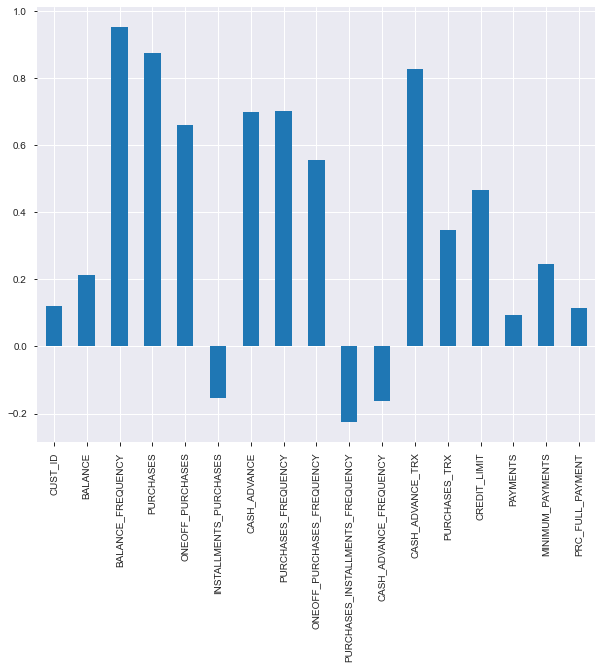

In [119]:
plt.figure(figsize=(10,8))
components_df.loc[0].plot(kind="bar")
plt.grid(True)

In [120]:
components_df.loc[0].sort_values()

PURCHASES_INSTALLMENTS_FREQUENCY   -0.225052
CASH_ADVANCE_FREQUENCY             -0.162159
INSTALLMENTS_PURCHASES             -0.153443
PAYMENTS                            0.094952
PRC_FULL_PAYMENT                    0.114408
CUST_ID                             0.119295
BALANCE                             0.212071
MINIMUM_PAYMENTS                    0.245778
PURCHASES_TRX                       0.348824
CREDIT_LIMIT                        0.466712
ONEOFF_PURCHASES_FREQUENCY          0.556431
ONEOFF_PURCHASES                    0.661976
CASH_ADVANCE                        0.700355
PURCHASES_FREQUENCY                 0.701548
CASH_ADVANCE_TRX                    0.828233
PURCHASES                           0.876775
BALANCE_FREQUENCY                   0.954328
Name: 0, dtype: float64

### Applyting PCA

In [34]:
pc = PCA(n_components=17)

In [35]:
pc.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
pc.explained_variance_

array([4.98849036, 3.73397193, 1.4741159 , 1.27714154, 1.06175153,
       0.92133425, 0.76048313, 0.65545103, 0.56612475, 0.44288699,
       0.30534098, 0.25596408, 0.20791352, 0.19169362, 0.10520623,
       0.04143235, 0.01259748])

In [37]:
#Eigen values
sum(pc.explained_variance_)

17.00189965359257

In [38]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [39]:
var

array([0.29340782, 0.21962087, 0.08670301, 0.07511758, 0.06244899,
       0.05419008, 0.0447293 , 0.03855164, 0.03329773, 0.02604927,
       0.01795923, 0.01505503, 0.01222884, 0.01127484, 0.00618791,
       0.00243692, 0.00074095])

In [40]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var1

array([29.34, 51.3 , 59.97, 67.48, 73.72, 79.14, 83.61, 87.47, 90.8 ,
       93.4 , 95.2 , 96.71, 97.93, 99.06, 99.68, 99.92, 99.99])

number of components have choosen as 6 based on cumulative variacne is explaining >75 % and individual component explaining >0.8 variance

In [43]:
pc_final=PCA(n_components=6).fit(data_scaled)

In [44]:
pc_final.explained_variance_

array([4.98849036, 3.73397193, 1.4741159 , 1.27714154, 1.06175153,
       0.92133425])

In [45]:
reduced_cr=pc_final.fit_transform(data_scaled)  # the out put is Factors (F1, F2, ...F6)

In [46]:
dimensions = pd.DataFrame(reduced_cr)

In [47]:
dimensions.columns = ["C1", "C2", "C3", "C4", "C5", "C6"]

In [48]:
dimensions.head()

,C1,C2,C3,C4,C5,C6
0,-1.768842,-1.413079,0.203232,-0.702741,-0.020126,-0.122327
1,-1.526632,2.713332,0.597695,0.307150,1.336507,-0.570203
2,1.032955,-0.292214,0.891875,-1.535690,-1.509544,-0.459656
3,-0.831358,-0.219733,1.589684,-1.104796,0.435601,0.380473
4,-1.717262,-0.975363,0.204672,-1.074372,-0.422827,-0.337193


#### Factor Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [49]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=data_num.columns).T

In [50]:
Loadings.to_csv("Loadings.csv")

### Clustering 

In [51]:
#selected the list variables from PCA based on factor loading matrics
list_var = ['PURCHASES','PURCHASES_FREQUENCY','CASH_ADVANCE','PAYMENTS','PURCHASES_INSTALLMENTS_FREQUENCY','TENURE','BALANCE_FREQUENCY']

In [52]:
data_scaled1=pd.DataFrame(data_scaled, columns=telco_num.columns)
data_scaled1.head(5)

data_scaled2=data_scaled1[list_var]
data_scaled2.head(5)

,PURCHASES,PURCHASES_FREQUENCY,CASH_ADVANCE,PAYMENTS,PURCHASES_INSTALLMENTS_FREQUENCY,TENURE,BALANCE_FREQUENCY
0,-0.551327,-0.806490,-0.527079,-0.642945,-0.707313,0.36068,-0.255968
1,-0.613881,-1.221758,3.101370,1.089747,-0.916995,0.36068,0.132501
2,-0.106917,1.269843,-0.527079,-0.456289,-0.916995,0.36068,0.520970
3,0.369006,-1.014125,-0.411186,-0.732573,-0.916995,0.36068,-1.032906
4,-0.603389,-1.014125,-0.527079,-0.431298,-0.916995,0.36068,0.520970


## Segmentation


In [53]:
km_3=KMeans(n_clusters=3,random_state=123)

In [54]:
km_3.fit(data_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [55]:
km_3.labels_

array([0, 0, 2, ..., 2, 0, 0])

In [56]:
km_3.cluster_centers_

array([[-0.43704694, -0.82212669,  0.13065083, -0.2185068 , -0.76785967,
        -0.07292817, -0.23947429],
       [ 2.3651833 ,  0.72062418,  0.8424564 ,  2.62712061,  0.61265017,
         0.27494955,  0.29770361],
       [ 0.15416734,  0.96572371, -0.32690453, -0.18473154,  0.91292572,
         0.04742193,  0.26539088]])

In [57]:
km_4=KMeans(n_clusters=4,random_state=123).fit(data_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(data_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(data_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(data_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(data_scaled2)
#km_5.labels_

In [58]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([data_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
data_num['cluster_3'] = km_3.labels_
data_num['cluster_4'] = km_4.labels_
data_num['cluster_5'] = km_5.labels_
data_num['cluster_6'] = km_6.labels_
data_num['cluster_7'] = km_7.labels_
data_num['cluster_8'] = km_8.labels_

In [59]:
data_num.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,0,1,1,0,3,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0,1,1,1,2,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,2,3,3,2,0,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,312.343947,0.000000,12,0,1,4,3,6,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,0,1,1,0,3,0


In [60]:
pd.Series(km_3.labels_).value_counts()

0    4746
2    3560
1     644
dtype: int64

In [61]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

0    0.530279
2    0.397765
1    0.071955
dtype: float64

In [62]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

0    0.344134
2    0.333520
3    0.130279
5    0.075307
1    0.058659
4    0.058101
dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [75]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(data_scaled, km_6.labels_)

0.18728160091289683

In [64]:
# calculate SC for K=3 through K=12
k_range = range(3, 9)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(data_scaled2)
    scores.append(metrics.silhouette_score(data_scaled2, km.labels_))

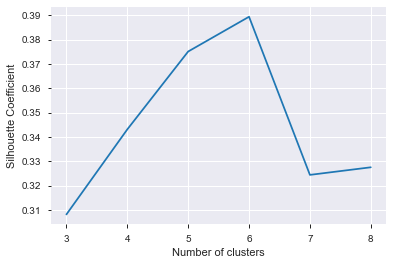

In [65]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Note

The solution can be 5, 7 based on the SC score. If we take highest SC score, 6 segment solution is best

In [77]:
data_num.cluster_6.value_counts()/sum(data_num.cluster_6.value_counts())

0    0.344134
2    0.333520
3    0.130279
5    0.075307
1    0.058659
4    0.058101
Name: cluster_6, dtype: float64

# Profiling

In [78]:
data_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,201.802084,139.509787,0.000000,12,0,1,1,0,3,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,4103.032597,1072.340217,0.222222,12,0,1,1,1,2,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,622.066742,627.284787,0.000000,12,2,3,3,2,0,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,312.343947,0.000000,12,0,1,4,3,6,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,678.334763,244.791237,0.000000,12,0,1,1,0,3,0


In [87]:
data_num.cluster_3.value_counts()/100

0    47.46
2    35.60
1     6.44
Name: cluster_3, dtype: float64

In [89]:
pd.Series.sort_index(data_num.cluster_3.value_counts())

0    4746
1     644
2    3560
Name: cluster_3, dtype: int64

In [90]:
data_num.cluster_3.size

8950

In [91]:
size=pd.concat([pd.Series(data_num.cluster_3.size), pd.Series.sort_index(data_num.cluster_3.value_counts()), pd.Series.sort_index(data_num.cluster_4.value_counts()),
           pd.Series.sort_index(data_num.cluster_5.value_counts()), pd.Series.sort_index(data_num.cluster_6.value_counts()),
           pd.Series.sort_index(data_num.cluster_7.value_counts()), pd.Series.sort_index(data_num.cluster_8.value_counts())])

In [92]:
size

0    8950
0    4746
1     644
2    3560
0     558
1    4312
2     727
3    3353
0     603
1    3333
2     701
3    3123
4    1190
0    3080
1     525
2    2985
3    1166
4     520
5     674
0    1610
1    2150
2     468
3    2494
4     676
5     470
6    1082
0    2248
1    2118
2    1073
3     472
4     208
5     668
6    1503
7     660
dtype: int64

In [94]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/data_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,4746,644,3560,558,4312,727,3353,603,3333,...,470,1082,2248,2118,1073,472,208,668,1503,660


In [95]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.530279,0.071955,0.397765,0.062346,0.481788,0.081229,0.374637,0.067374,0.372402,...,0.052514,0.120894,0.251173,0.236648,0.119888,0.052737,0.02324,0.074637,0.167933,0.073743


In [96]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,4746.000000,644.000000,3560.000000,558.000000,4312.000000,727.000000,3353.000000,603.000000,3333.000000,...,470.000000,1082.000000,2248.000000,2118.000000,1073.000000,472.000000,208.00000,668.000000,1503.000000,660.000000
Seg_Pct,1.0,0.530279,0.071955,0.397765,0.062346,0.481788,0.081229,0.374637,0.067374,0.372402,...,0.052514,0.120894,0.251173,0.236648,0.119888,0.052737,0.02324,0.074637,0.167933,0.073743


In [97]:
telco_num.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [98]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([data_num.apply(lambda x: x.mean()).T, data_num.groupby('cluster_3').apply(lambda x: x.mean()).T, data_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_5').apply(lambda x: x.mean()).T, data_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          data_num.groupby('cluster_7').apply(lambda x: x.mean()).T, data_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [99]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE,1541.046707,1593.389539,3273.543618,1157.859321,3504.849597,1590.517729,1061.005371,1254.696868,3289.491341,2123.290634,...,2901.553889,102.397826,1692.542268,1174.866599,91.549061,2828.994765,4320.366552,1011.926745,1202.734950,4065.657489
BALANCE_FREQUENCY,0.878083,0.822042,0.947670,0.940207,0.934591,0.831934,0.781693,0.948927,0.958209,0.972591,...,0.978531,0.349572,0.976828,0.973034,0.350556,0.977273,0.889010,0.807945,0.940791,0.948486
PURCHASES,936.229237,269.688955,4544.281289,1172.132230,4051.605376,276.691122,428.142517,1376.112180,4775.979486,262.236532,...,5983.915894,332.787311,158.166179,1258.379202,330.027717,5936.089661,1012.719904,445.255045,1007.980499,271.851652
ONEOFF_PURCHASES,536.493774,220.305139,2914.432512,527.852963,2645.381616,219.863908,269.901967,650.529209,3052.278570,222.705722,...,3794.715889,203.446470,141.298554,447.379792,201.045573,3777.225300,622.071858,275.567455,729.346088,194.212591
INSTALLMENTS_PURCHASES,384.498368,49.567413,1415.626216,644.480385,1182.135798,57.029290,158.653205,721.854292,1494.876158,39.709793,...,1894.608797,129.615148,17.060507,811.280094,129.238248,1875.953864,367.076543,170.136692,278.897079,77.740500
CASH_ADVANCE,935.920972,1167.914384,2435.394983,355.386704,3413.727721,1025.253732,1323.841482,324.576732,2325.152908,1377.167654,...,646.773788,296.024532,673.715651,338.258111,254.625588,473.233167,7179.017364,1193.589945,274.579042,4463.218081
PURCHASES_FREQUENCY,0.490351,0.160391,0.779230,0.877976,0.670150,0.170968,0.405079,0.889647,0.812032,0.153458,...,0.931917,0.252809,0.089354,0.953017,0.256292,0.930087,0.342366,0.431571,0.658240,0.161272
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.099712,0.546973,0.277110,0.469849,0.101056,0.129169,0.304254,0.568564,0.108073,...,0.695635,0.072127,0.065165,0.226466,0.072266,0.696395,0.170202,0.136435,0.393786,0.092739
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.059270,0.607311,0.727334,0.506865,0.068904,0.268200,0.741661,0.641359,0.046415,...,0.757058,0.176297,0.023808,0.898584,0.179520,0.751025,0.247737,0.287942,0.309427,0.074156
CASH_ADVANCE_FREQUENCY,0.134017,0.177304,0.190444,0.066100,0.257200,0.161893,0.210295,0.061129,0.184085,0.209844,...,0.080703,0.034514,0.176951,0.063838,0.032919,0.066766,0.468538,0.206863,0.062891,0.408263


In [100]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [101]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,4746.000000,644.000000,3560.000000,558.000000,4312.000000,727.000000,3353.000000,603.000000,3333.000000,...,470.000000,1082.000000,2248.000000,2118.000000,1073.000000,472.000000,208.000000,668.000000,1503.000000,660.000000
Seg_Pct,1.000000,0.530279,0.071955,0.397765,0.062346,0.481788,0.081229,0.374637,0.067374,0.372402,...,0.052514,0.120894,0.251173,0.236648,0.119888,0.052737,0.023240,0.074637,0.167933,0.073743
BALANCE,1541.046707,1593.389539,3273.543618,1157.859321,3504.849597,1590.517729,1061.005371,1254.696868,3289.491341,2123.290634,...,2901.553889,102.397826,1692.542268,1174.866599,91.549061,2828.994765,4320.366552,1011.926745,1202.734950,4065.657489
BALANCE_FREQUENCY,0.878083,0.822042,0.947670,0.940207,0.934591,0.831934,0.781693,0.948927,0.958209,0.972591,...,0.978531,0.349572,0.976828,0.973034,0.350556,0.977273,0.889010,0.807945,0.940791,0.948486
PURCHASES,936.229237,269.688955,4544.281289,1172.132230,4051.605376,276.691122,428.142517,1376.112180,4775.979486,262.236532,...,5983.915894,332.787311,158.166179,1258.379202,330.027717,5936.089661,1012.719904,445.255045,1007.980499,271.851652
ONEOFF_PURCHASES,536.493774,220.305139,2914.432512,527.852963,2645.381616,219.863908,269.901967,650.529209,3052.278570,222.705722,...,3794.715889,203.446470,141.298554,447.379792,201.045573,3777.225300,622.071858,275.567455,729.346088,194.212591
INSTALLMENTS_PURCHASES,384.498368,49.567413,1415.626216,644.480385,1182.135798,57.029290,158.653205,721.854292,1494.876158,39.709793,...,1894.608797,129.615148,17.060507,811.280094,129.238248,1875.953864,367.076543,170.136692,278.897079,77.740500
CASH_ADVANCE,935.920972,1167.914384,2435.394983,355.386704,3413.727721,1025.253732,1323.841482,324.576732,2325.152908,1377.167654,...,646.773788,296.024532,673.715651,338.258111,254.625588,473.233167,7179.017364,1193.589945,274.579042,4463.218081
PURCHASES_FREQUENCY,0.490351,0.160391,0.779230,0.877976,0.670150,0.170968,0.405079,0.889647,0.812032,0.153458,...,0.931917,0.252809,0.089354,0.953017,0.256292,0.930087,0.342366,0.431571,0.658240,0.161272
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.099712,0.546973,0.277110,0.469849,0.101056,0.129169,0.304254,0.568564,0.108073,...,0.695635,0.072127,0.065165,0.226466,0.072266,0.696395,0.170202,0.136435,0.393786,0.092739


In [102]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [103]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,4746.000000,644.000000,3560.000000,558.000000,4312.000000,727.000000,3353.000000,603.000000,3333.000000,...,470.000000,1082.000000,2248.000000,2118.000000,1073.000000,472.000000,208.000000,668.000000,1503.000000,660.000000
Seg_Pct,1.000000,0.530279,0.071955,0.397765,0.062346,0.481788,0.081229,0.374637,0.067374,0.372402,...,0.052514,0.120894,0.251173,0.236648,0.119888,0.052737,0.023240,0.074637,0.167933,0.073743
BALANCE,1541.046707,1593.389539,3273.543618,1157.859321,3504.849597,1590.517729,1061.005371,1254.696868,3289.491341,2123.290634,...,2901.553889,102.397826,1692.542268,1174.866599,91.549061,2828.994765,4320.366552,1011.926745,1202.734950,4065.657489
BALANCE_FREQUENCY,0.878083,0.822042,0.947670,0.940207,0.934591,0.831934,0.781693,0.948927,0.958209,0.972591,...,0.978531,0.349572,0.976828,0.973034,0.350556,0.977273,0.889010,0.807945,0.940791,0.948486
PURCHASES,936.229237,269.688955,4544.281289,1172.132230,4051.605376,276.691122,428.142517,1376.112180,4775.979486,262.236532,...,5983.915894,332.787311,158.166179,1258.379202,330.027717,5936.089661,1012.719904,445.255045,1007.980499,271.851652
ONEOFF_PURCHASES,536.493774,220.305139,2914.432512,527.852963,2645.381616,219.863908,269.901967,650.529209,3052.278570,222.705722,...,3794.715889,203.446470,141.298554,447.379792,201.045573,3777.225300,622.071858,275.567455,729.346088,194.212591
INSTALLMENTS_PURCHASES,384.498368,49.567413,1415.626216,644.480385,1182.135798,57.029290,158.653205,721.854292,1494.876158,39.709793,...,1894.608797,129.615148,17.060507,811.280094,129.238248,1875.953864,367.076543,170.136692,278.897079,77.740500
CASH_ADVANCE,935.920972,1167.914384,2435.394983,355.386704,3413.727721,1025.253732,1323.841482,324.576732,2325.152908,1377.167654,...,646.773788,296.024532,673.715651,338.258111,254.625588,473.233167,7179.017364,1193.589945,274.579042,4463.218081
PURCHASES_FREQUENCY,0.490351,0.160391,0.779230,0.877976,0.670150,0.170968,0.405079,0.889647,0.812032,0.153458,...,0.931917,0.252809,0.089354,0.953017,0.256292,0.930087,0.342366,0.431571,0.658240,0.161272
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.099712,0.546973,0.277110,0.469849,0.101056,0.129169,0.304254,0.568564,0.108073,...,0.695635,0.072127,0.065165,0.226466,0.072266,0.696395,0.170202,0.136435,0.393786,0.092739


In [104]:
Profling_output_final.to_csv('Profiling_output.csv')

#### According to profiling output. KM5 has all types of customers.  For example, KM5_1 has 7 % of customers that doesn’t bring any profit to the company but pay in full so there are no  default in the segment so there is no need to send any advisement because they are using the full extent of the credit card limit.  On the other hand, KM5_3 don’t pay the in full and pays the interest on the balance so they are income generator customers but all the more risk of default the payment so the company needs to pay the closer look into these customers.  The Marketing department should target the KM5_5 customers for the Cash Advance services which will bring the highest profit to the company. The KM5_2,KM5_3 and KM5_5 are the customer’s purchase amount it below the average so the marketing should send them the advisement regarding the cash back offer so they would because more loyal to the company.